In [2]:
import pandas as pd

In [4]:
df1=pd.read_excel('data_set/肿瘤数据.xlsx')
print(df1.head(10))
print(df1.tail(10))

     最大周长   最大凹陷度    平均凹陷度    最大面积   最大半径  平均灰度值  肿瘤性质
0  184.60  0.2654  0.14710  2019.0  25.38  17.33     0
1  158.80  0.1860  0.07017  1956.0  24.99  23.41     0
2  152.50  0.2430  0.12790  1709.0  23.57  25.53     1
3   98.87  0.2575  0.10520   567.7  14.91  26.50     0
4  152.20  0.1625  0.10430  1575.0  22.54  16.67     0
5  103.40  0.1741  0.08089   741.6  15.47  23.75     0
6  153.20  0.1932  0.07400  1606.0  22.88  27.66     0
7  110.60  0.1556  0.05985   897.0  17.06  28.14     0
8  106.20  0.2060  0.09353   739.3  15.49  30.73     0
9   97.65  0.2210  0.08543   711.4  15.09  40.68     0
       最大周长    最大凹陷度    平均凹陷度    最大面积    最大半径  平均灰度值  肿瘤性质
559   82.28  0.09653  0.04105   474.2  12.480  37.16     1
560  100.20  0.10480  0.04304   706.7  15.300  33.17     1
561   75.19  0.00000  0.00000   439.6  11.920  38.30     1
562  128.70  0.23560  0.09429   915.0  17.520  42.79     0
563  179.10  0.25420  0.14740  1819.0  24.290  29.41     0
564  166.10  0.22160  0.13890  2027.0  25

In [6]:
print(df1.dtypes) #检查每列的数据类型
print(df1.shape)

最大周长     float64
最大凹陷度    float64
平均凹陷度    float64
最大面积     float64
最大半径     float64
平均灰度值    float64
肿瘤性质       int64
dtype: object
(569, 7)


In [7]:
# 写入到excel和csv当中
df1.to_excel('data_set/肿瘤数据_write_test.xlsx',sheet_name='cancer',index=True)
df1.to_csv('data_set/肿瘤数据_write_test.csv',index=True)

In [8]:
# 展示详细信息
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   最大周长    569 non-null    float64
 1   最大凹陷度   569 non-null    float64
 2   平均凹陷度   569 non-null    float64
 3   最大面积    569 non-null    float64
 4   最大半径    569 non-null    float64
 5   平均灰度值   569 non-null    float64
 6   肿瘤性质    569 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


### 获取局部数据
1.局部的列
2.局部的行和列

In [13]:
s1=df1['最大周长']
print(type(s1))
print(s1)
print('*'*20)

df2=df1[['最大周长','最大面积']]
print(type(df2))

<class 'pandas.core.series.Series'>
0      184.60
1      158.80
2      152.50
3       98.87
4      152.20
        ...  
564    166.10
565    155.00
566    126.70
567    184.60
568     59.16
Name: 最大周长, Length: 569, dtype: float64
********************
<class 'pandas.core.frame.DataFrame'>


In [19]:
s2=df1[df1['最大半径']<18] #还是包含全部的列
print(s2.shape)
print(df1[df1['肿瘤性质']==1].shape)
# 先选择，然后进行投影
s3=df1[df1['最大半径']<18][['最大周长','最大面积']]
print(s3.shape)

(414, 7)
(358, 7)
(414, 2)


In [22]:
## 同时选择行和列
s3=df1.loc[df1['最大半径']<18,['最大周长','最大面积']]
print(s3.shape)
s3=df1.iloc[0:100,[2,3,4]]
print(s3)
s3=df1.iloc[-100:,[2,3,4]]
print(s3)

(414, 2)
       平均凹陷度    最大面积   最大半径
0   0.147100  2019.0  25.38
1   0.070170  1956.0  24.99
2   0.127900  1709.0  23.57
3   0.105200   567.7  14.91
4   0.104300  1575.0  22.54
..       ...     ...    ...
95  0.086830  1750.0  24.22
96  0.029410   495.2  12.83
97  0.007937   366.1  10.92
98  0.033500   512.5  13.06
99  0.058390   826.4  16.33

[100 rows x 3 columns]
       平均凹陷度    最大面积    最大半径
469  0.05564   528.1  13.360
470  0.01514   385.2  11.140
471  0.02377   567.6  13.600
472  0.03221   906.6  17.180
473  0.00000   558.9  13.450
..       ...     ...     ...
564  0.13890  2027.0  25.450
565  0.09791  1731.0  23.690
566  0.05302  1124.0  18.980
567  0.15200  1821.0  25.740
568  0.00000   268.6   9.456

[100 rows x 3 columns]


## 结合plt来进行绘图

In [26]:
import matplotlib.pyplot as plt
air_quality=pd.read_csv('data_set/Air Quality NO2 Long.csv',index_col=0)
air_quality.head()

,country,date.utc,location,parameter,value,unit
city,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


<Axes: xlabel='city'>

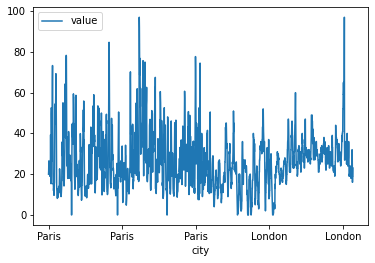

In [27]:
# quick view
air_quality.plot()

## 获取当前数据的一些特征
可以获取任意局部位置的特征
- 均值
- 方差
- 中位数